# Sentiment Analysis - Unlabelled Data 

In [ ]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import os
import sys
reload(sys)
sys.setdefaultencoding('utf8')
sns.set(rc={'figure.figsize':(16,8)})
pd.set_option('display.max_columns',200)
import ast
plt.style.use('fivethirtyeight')
cp = sns.color_palette()

In [ ]:
#Loading the dataset
df=pd.read_csv('apr.csv')

In [ ]:
#Examine the number of tweets
df.shape

(2861, 2)

In [ ]:
#Viewing sample tweets
df.sample(10)

,Month,Tweet
2785,Nov,ClickHole: Here are the swing states if they w...
1244,Feb,princess cruise https://t.co/FfnrKJiHsR
1675,Mar,#princess cruise drink prices aeron chair size b
468,Dec,Princess Cruise Lines' Illegal Ocean Dumping P...
113,Apr,Princess Cruises Fined $40 Million for Water P...
1123,Feb,Majestic Princess: https://t.co/AkNLfVxyad Pri...
275,Dec,Read This! Princess Cruise Passenger Sues for ...
1011,Dec,"Carnival's #Princess Cruise Line to Pay ""Large..."
192,Apr,"Did the Easter Bunny Bring You A ""Princess"" Cr..."
470,Dec,New story on NPR: Princess Cruise Lines' Illeg...


In [ ]:
#Import Vader sentiment package for  Sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
#Encoding to uncode format to avoid any errors due to format of tweets/emojis
df.Tweet=df.Tweet.map(lambda x:str(x).encode('utf-8'))

In [ ]:
#Sentiment Analysis
emptyline=[]
for row in df['Tweet']:
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)
#creating new dataframe with sentiments    
d=pd.DataFrame(emptyline)

In [ ]:
#Concatenating two dataframes to merge sentiment scores to respective tweets
df_c = pd.concat([df.reset_index(drop=True), d], axis=1)


In [ ]:
#examine the new dataframe
df_c.head()

,Month,Tweet,compound,neg,neu,pos
0,Apr,RT @LittleDebbie: Imagine the wind in your hai...,0.7263,0.0,0.747,0.253
1,Apr,RT https://t.co/gmXmbulPtl This Week in #Trave...,0.0000,0.0,1.000,0.000
2,Apr,Win a $2 000 Princess #Cruise Lines Gift Card ...,0.7901,0.0,0.696,0.304
3,Apr,@CruiseHabit @paulhewittcom Princess cruise line,0.0000,0.0,1.000,0.000
4,Apr,It's all about Education ~ Ship Tour of the Ru...,0.0000,0.0,1.000,0.000


In [ ]:
#Adding new column to new dataframe to mark positive and negative tweets
df_c['Sentiment'] = np.where(df_c['compound'] >= 0 , 'Positive', 'Negative')


In [ ]:
#examine the new column
df_c.sample(10)

,Month,Tweet,compound,neg,neu,pos,Sentiment
1958,May,Retweet Jack Rogers is giving away summer geta...,0.6908,0.000,0.759,0.241,Positive
2437,Sep,Dear princess cruise lines-- stop sending me c...,0.3769,0.085,0.731,0.184,Positive
2294,Aug,25 Tips for Cruising on Princess Cruise Ships ...,0.0000,0.000,1.000,0.000,Positive
2353,Aug,RT https://t.co/bkhj8noRuF ON SALE: 33 Night P...,0.0000,0.000,1.000,0.000,Positive
2001,July,Cruise Bruise: Regal Princess #cruise ship pas...,-0.5994,0.245,0.755,0.000,Negative
1397,Jan,Win a Free Princess Cruise or a Game Prize Pac...,0.8932,0.000,0.428,0.572,Positive
2240,Aug,Home of The Florida Princess Cruise Ship (@ Su...,0.6808,0.000,0.714,0.286,Positive
1201,Feb,Filipino Crew Member Killed on Emerald Princes...,-0.6705,0.209,0.791,0.000,Negative
2542,Sep,Vintage Adjustable Princess Cruise Lines Dos E...,0.0000,0.000,1.000,0.000,Positive
1025,Dec,Princess cruise lines guilty of discharging oi...,-0.3400,0.257,0.596,0.147,Negative


In [ ]:
#Creating a dictionary to map months for viewing month wise sentiments
Month_dict = {'Jan' : 7, 'Feb' :8, 'Mar' : 9, 'Apr' : 10, 'May' : 11, 'Jun' : 12, 'July' : 1, 'Aug' : 2, 'Sep' : 3 , 'Oct' : 4 , 'Nov' : 5, 'Dec' : 6}

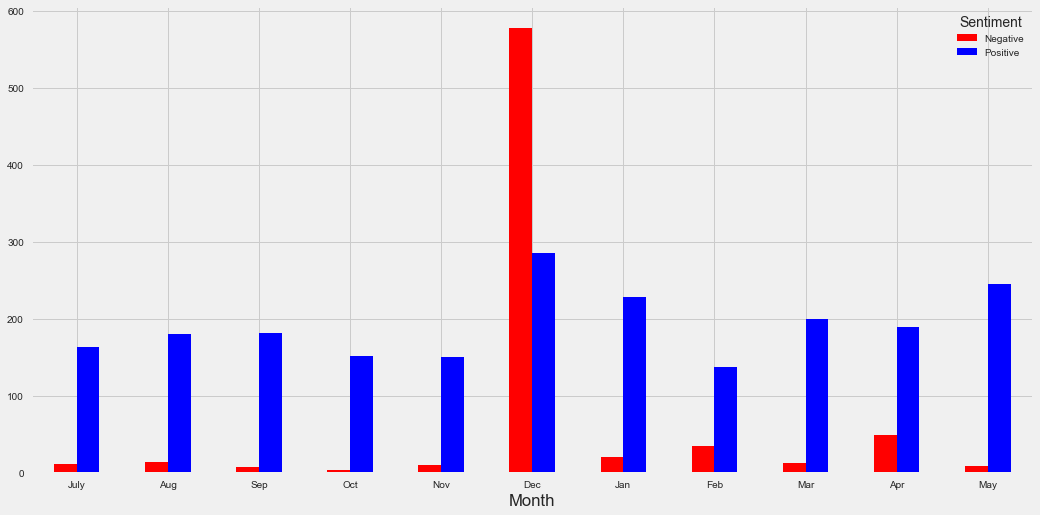

In [ ]:
#Plotting the sentiment Chart
result=df_c.groupby('Month')['Sentiment'].value_counts().unstack()
result['Month_Numeric'] = result.index.map(lambda x : Month_dict[x])
result = result.sort_values('Month_Numeric')
result[['Negative','Positive']].plot(kind='bar', rot=0,color='rb');

## Decemeber Month has seen the highest number of negative tweets

### We will explore Dec Month tweets again to figure out Topics of negative sentiments